In [1]:
# https://www.kaggle.com/negarev/beginners-start-here-house-prices-eda

In [2]:
import pandas as pd # pandas data analysis library
import numpy as np # working with different types of arrays
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline

<h2>Loading Dataset</h2>

In [3]:
housing = pd.read_csv('data.csv')

<h1>Data Preprocessing</h1>

<h3>Exploration</h3>

In [4]:
# what information can we gather from the data?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
# How many features does the dataset have and how many houses
housing.shape

(4600, 18)

In [6]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<p>What stands out from the data description is that the mean for bedrooms is 3.4 but there is a house with 9 bedrooms</p>
<p>This also applies to the number of bathrooms as well. The mean for bathrooms is 2.1 but there is a house wih 8 bathooms!</p>

In [7]:
housing.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

<p>The object data types are interesting. Those are probably text, which could be categorical data</p>

In [8]:
housing['street'].value_counts()

2520 Mulberry Walk NE        4
2500 Mulberry Walk NE        3
7075-7131 Thompson Ave SE    2
2008 Yale Ave E              2
4507 Linden Ave N            2
                            ..
4508 NE 26th Ct              1
5001-5099 11th Ave NW        1
26429 SE 154th Pl            1
12807 SE 67th St             1
29414 2nd Ave SW             1
Name: street, Length: 4525, dtype: int64

In [9]:
housing['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Tukwila                  29
SeaTac                   29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Medina                   11
Fall City                11
Clyde Hill               11
Black Diamond             9
Ravensdale                7
Pacific             

In [10]:
housing['statezip'].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [11]:
housing['country'].value_counts()

USA    4600
Name: country, dtype: int64

<p>Checking to see if any null values exist</p>

In [12]:
housing.isnull().values.any() # checking to see if null values exists

False

<h2>Data Visualization</h2>

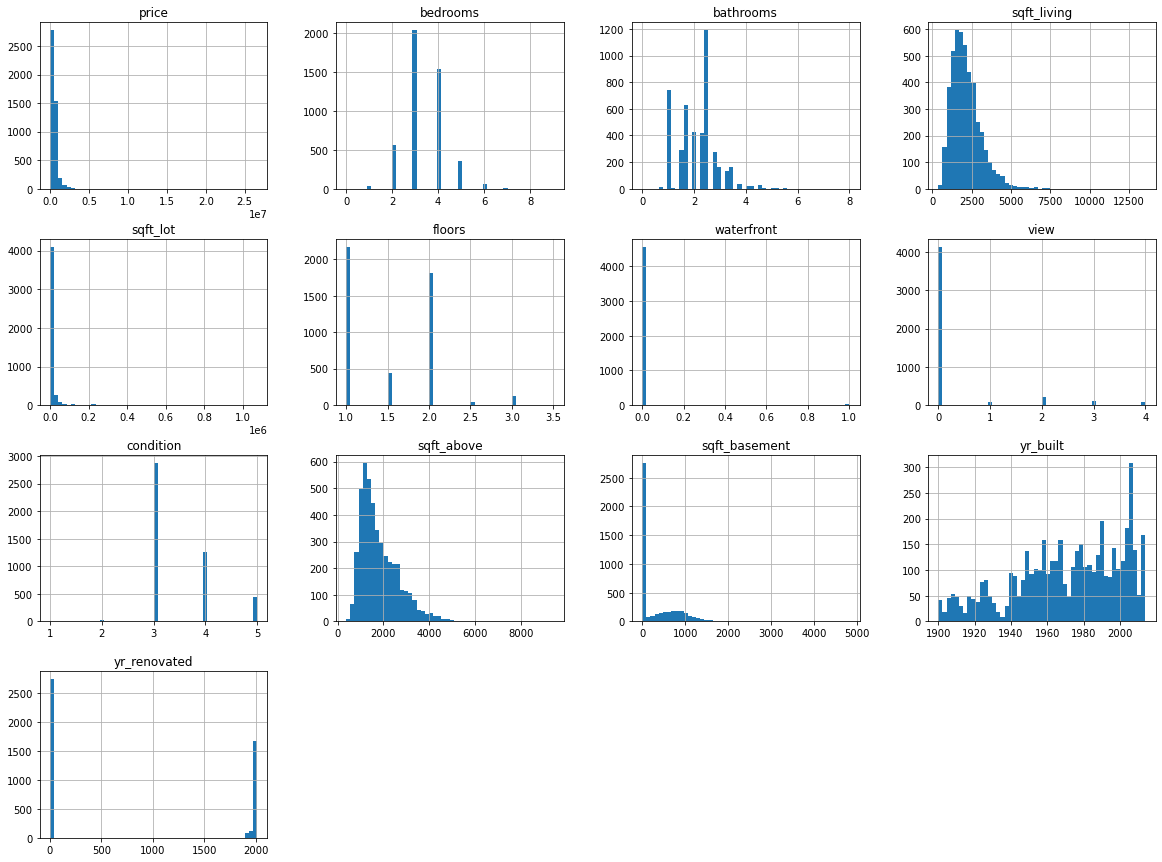

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

<h3>Visualizing data using seaborn</h3>

In [14]:
import seaborn as sns

%matplotlib inline

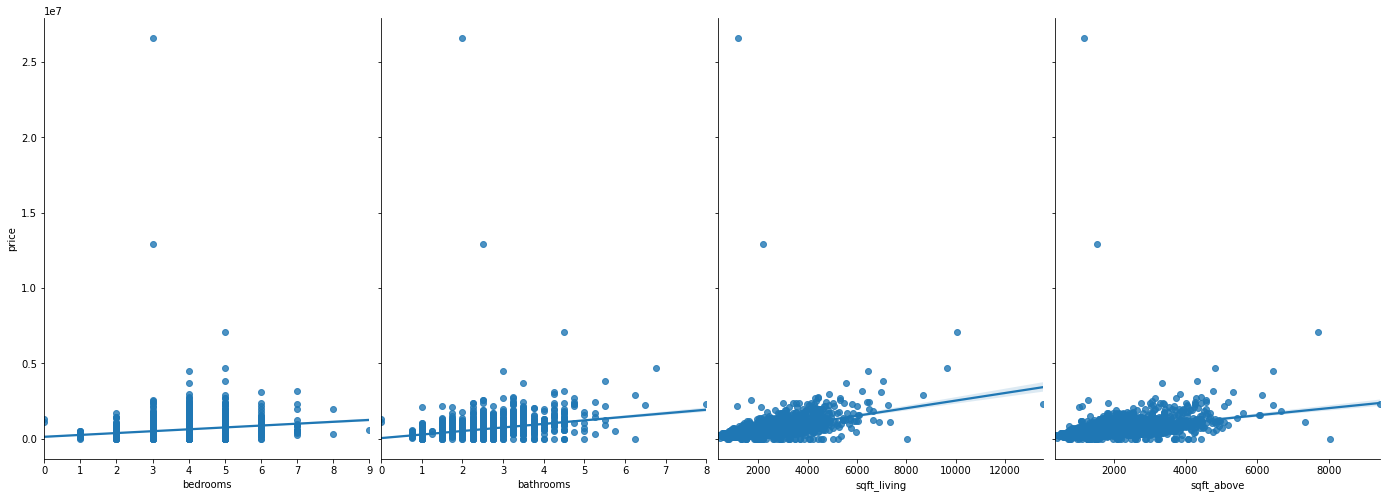

In [15]:
sns.pairplot(housing, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above'], y_vars='price', height=7, aspect=0.7, kind='reg')

<p>Lets look for some correlations</p>

In [16]:
# compute the standard correlation coefficient (Pearson's r)
corr_matrix = housing.corr(method='pearson')

In [17]:
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

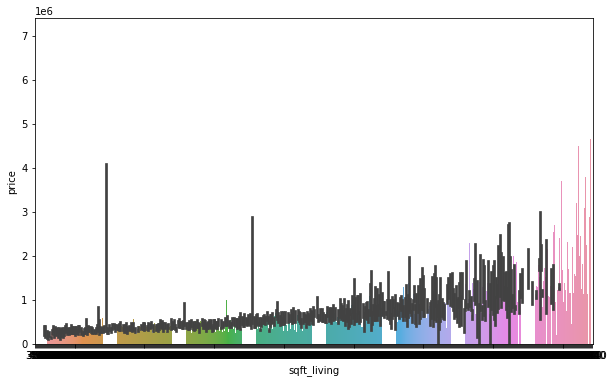

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=housing.sqft_living, y=housing['price'])

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

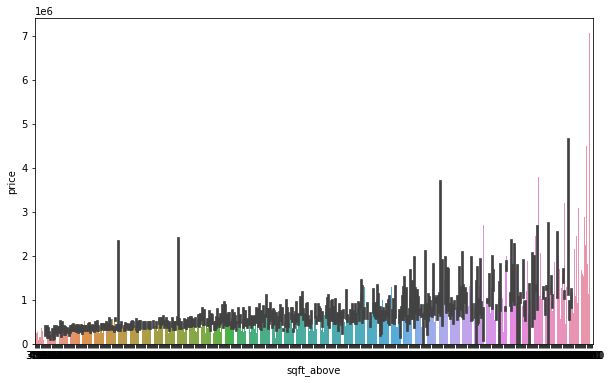

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=housing.sqft_above, y=housing['price'])

<p>Looks like there is a correlation between prices and sqft_living, sqft_above, and bathrooms</p>
<p>Lets look deeper into those relationships</p>

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

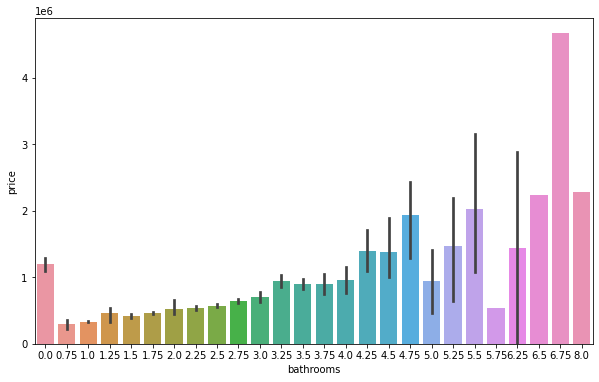

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x=housing.bathrooms, y=housing['price'])

<p>There is some information here</p>
<p>There appears to be some houses without bathrooms. Also, a house with around 5 bathrooms sells for less than expected.</p>

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

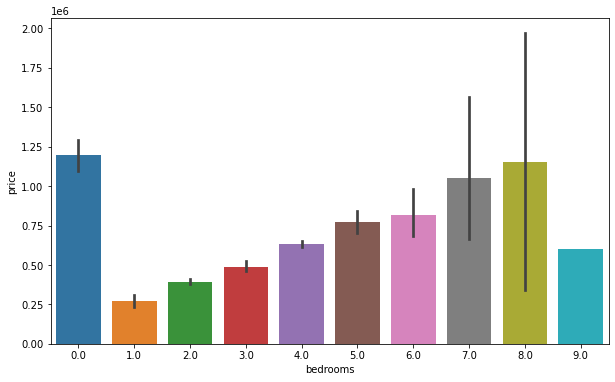

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=housing.bedrooms, y=housing['price'])

In [22]:
# taking closer look at price breakdown for each bathroom group
bathroomgroup = housing.groupby(['bathrooms']).price.agg([len, min, max])
bathroomgroup

,len,min,max
bathrooms,,,
0.00,2.0,1095000.0,1295648.0
0.75,17.0,80000.0,562100.0
1.00,743.0,0.0,2110000.0
1.25,3.0,321950.0,545000.0
1.50,291.0,0.0,2199900.0
1.75,629.0,0.0,2100000.0
2.00,427.0,0.0,26590000.0
2.25,419.0,0.0,2400000.0
2.50,1189.0,0.0,12899000.0


<p>
There are housing with fractional bathrooms, which is werid.
Also, there is only one house with 8 bathrooms. Same goes for 6.5 and 6.75.
There are also two houses with no bathrooms.
</p>
<p>Lets take a look to see if there are fractional bedrooms</p>

In [23]:
# taking closer look at price breakdown for each bathroom group
bedroomgroup = housing.groupby(['bedrooms']).price.agg([len, min, max])
bedroomgroup

,len,min,max
bedrooms,,,
0.0,2.0,1095000.0,1295648.0
1.0,38.0,0.0,540000.0
2.0,566.0,0.0,1695000.0
3.0,2032.0,0.0,26590000.0
4.0,1531.0,0.0,4489000.0
5.0,353.0,0.0,7062500.0
6.0,61.0,0.0,3100000.0
7.0,14.0,280000.0,3200000.0
8.0,2.0,340000.0,1970000.0


<p>There is only one house with 9 bedrooms.</p>
<p>There are also two houses with no bedrooms. The min for the row with 0 bedrooms is 1095000, which is the same value for the row we saw before with no bathrooms. We can assume those values are related to the same houses.</p>
<p>Another problem we have with our data is that there are a couple houses with a price of zero. We should look into that more</p>

In [ ]:
# lets get rid of those

In [24]:
# lets see how many houses with prices of 0.
housing_zero_prices = housing[housing.price==0]
len(housing_zero_prices)

49

<h2>Preparation for Machine Learning Algorithm</h2>

<h3>Data Cleaning</h3>

In [81]:
# dropping street and city because we already have statezip
# housing.drop(['street', 'city'], axis=1, inplace = True)
housing.drop(['date'], axis = 1, inplace = True)

In [82]:
pd.set_option('float_format', '{:f}'.format)
housing['price'].describe()

count       4600.000000
mean      551962.988473
std       563834.702547
min            0.000000
25%       322875.000000
50%       460943.461539
75%       654962.500000
max     26590000.000000
Name: price, dtype: float64

<p>We have a giant outlier for price at $27,000,000. We're going to need to get rid of that</p>

In [83]:
# New dataset
# 1. No houses with 0 or 9 bedrooms(replace with something)
# 2. Get rid of outlier house with huge cost
houses = housing[(housing.bedrooms > 0) & (housing.bedrooms < 9) & (housing.price<2.5*10**7)].copy()



In [84]:
# analysis on instances whose price is 0
zero_price = houses[(housing.price == 0)].copy()
zero_price.shape


C:\Users\fpaul\Anaconda3\envs\handson_2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(49, 15)

In [85]:
zero_price.agg([min, max, 'mean', 'median'])


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,country
min,0.000000,1.000000,1.000000,720.000000,3500.000000,1.000000,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000,WA 98001,USA
max,0.000000,6.000000,6.250000,8020.000000,188200.000000,3.000000,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000,WA 98199,USA
mean,0.000000,3.979592,2.698980,2787.142857,16453.306122,1.500000,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286,NaN,NaN
median,0.000000,4.000000,2.500000,2600.000000,9000.000000,1.500000,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000,NaN,NaN


In [86]:
sim_from_ori = houses[(houses.bedrooms == 4) & (houses.bathrooms > 1) & (houses.bathrooms < 4) & 
                  (houses.sqft_living > 2500) & (houses.sqft_living < 3000) 
                  & (houses.floors < 3) & (houses.yr_built < 1970)].copy()


In [87]:
sim_from_ori

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,country
11,1400000.000000,4.000000,2.500000,2920,4000,1.500000,0,0,5,1910,1010,1909,1988,WA 98105,USA
172,407000.000000,4.000000,2.250000,2810,23400,1.000000,0,1,3,1710,1100,1958,2004,WA 98198,USA
207,360000.000000,4.000000,2.000000,2680,18768,1.000000,0,0,5,2680,0,1965,0,WA 98001,USA
257,749950.000000,4.000000,2.750000,2600,6050,2.000000,0,0,5,1960,640,1949,0,WA 98116,USA
261,581000.000000,4.000000,2.000000,2510,13695,1.000000,0,0,4,1280,1230,1961,2001,WA 98033,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,537500.000000,4.000000,3.000000,2920,33976,1.000000,0,3,5,1460,1460,1964,0,WA 98008,USA
4380,642000.000000,4.000000,2.500000,2550,10000,1.000000,0,0,3,1290,1260,1964,2000,WA 98007,USA
4450,596165.428571,4.000000,2.000000,2580,6000,1.000000,0,0,5,1300,1280,1950,0,WA 98199,USA
4460,535000.000000,4.000000,2.250000,2980,8051,1.500000,0,2,4,2020,960,1935,0,WA 98199,USA


In [88]:
sim_from_ori.price.mean()

735475.0370705189

<p>The value for houses with 0 price, $735000</p>

In [90]:
houses.price.replace(to_replace = 0, value = 735000, inplace = True)
len(houses[(houses.price) == 0])

0

In [71]:
houses['price'].describe()

count       4596.000000
mean      546007.201910
std       412817.875333
min            0.000000
25%       322500.000000
50%       460000.000000
75%       653250.000000
max     12899000.000000
Name: price, dtype: float64

<h3>Pearson Correlation Matrix</h3>

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

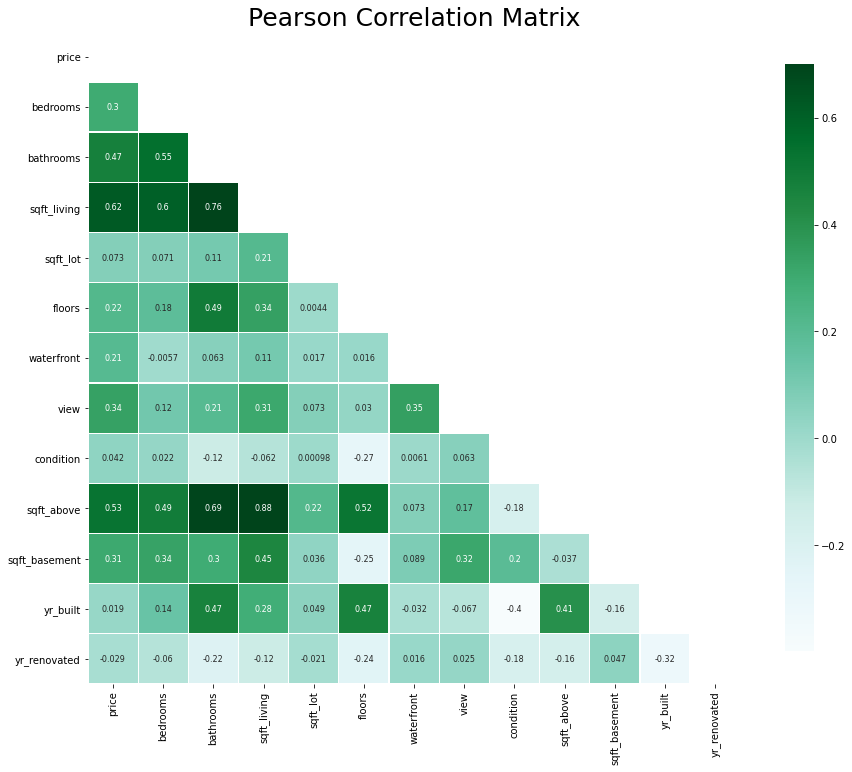

In [31]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 
            'sqft_lot', 'floors', 'waterfront', 'view', 
            'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
mask = np.zeros_like(houses[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix', fontsize=25)

sns.heatmap(houses[features].corr(), linewidths=0.25, vmax=0.7, square=True,
           cmap="BuGn", linecolor='w', annot=True, annot_kws={"size": 8}, mask=mask,
           cbar_kws={"shrink": .9})

<p>It's best to choose features that are highly correlated with houses prices,
    but not correlated with each other </p>

<p>sqft_living is correlated more with price than sqft_above. So we will get rid of sqft_above since it is highly correlated to sqft_living</p>

In [91]:
# removing sqft_above
houses.drop(['sqft_above'], axis = 1, inplace = True)
houses.shape

(4596, 14)

In [99]:
# resetting the index
houses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4596 non-null   int64  
 1   price          4596 non-null   float64
 2   bedrooms       4596 non-null   float64
 3   bathrooms      4596 non-null   float64
 4   sqft_living    4596 non-null   int64  
 5   sqft_lot       4596 non-null   int64  
 6   floors         4596 non-null   float64
 7   waterfront     4596 non-null   int64  
 8   view           4596 non-null   int64  
 9   condition      4596 non-null   int64  
 10  sqft_basement  4596 non-null   int64  
 11  yr_built       4596 non-null   int64  
 12  yr_renovated   4596 non-null   int64  
 13  statezip       4596 non-null   object 
 14  country        4596 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 538.7+ KB


In [100]:
# removing country
houses.drop(['country'], axis = 1, inplace = True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4596 non-null   int64  
 1   price          4596 non-null   float64
 2   bedrooms       4596 non-null   float64
 3   bathrooms      4596 non-null   float64
 4   sqft_living    4596 non-null   int64  
 5   sqft_lot       4596 non-null   int64  
 6   floors         4596 non-null   float64
 7   waterfront     4596 non-null   int64  
 8   view           4596 non-null   int64  
 9   condition      4596 non-null   int64  
 10  sqft_basement  4596 non-null   int64  
 11  yr_built       4596 non-null   int64  
 12  yr_renovated   4596 non-null   int64  
 13  statezip       4596 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 502.8+ KB


<h2> Handling Categorical statezip</h2>

In [101]:
# handling categorical data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [102]:
houses['statezip_encoded'] = le.fit_transform(houses.statezip)
houses.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip,statezip_encoded
0,0,313000.000000,3.000000,1.500000,1340,7912,1.500000,0,0,3,0,1955,2005,WA 98133,62
1,1,2384000.000000,5.000000,2.500000,3650,9050,2.000000,0,4,5,280,1921,0,WA 98119,58
2,2,342000.000000,3.000000,2.000000,1930,11947,1.000000,0,0,4,0,1966,0,WA 98042,26
3,3,420000.000000,3.000000,2.250000,2000,8030,1.000000,0,0,4,1000,1963,0,WA 98008,7
4,4,550000.000000,4.000000,2.500000,1940,10500,1.000000,0,0,4,800,1976,1992,WA 98052,31


In [103]:
# confirming label encoding
houses.statezip_encoded.value_counts()

47    147
31    135
56    132
54    130
5     110
     ... 
28      6
75      3
29      2
76      2
39      1
Name: statezip_encoded, Length: 77, dtype: int64

In [104]:
houses.drop(['statezip'], axis = 1, inplace = True)
houses.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip_encoded
0,0,313000.000000,3.000000,1.500000,1340,7912,1.500000,0,0,3,0,1955,2005,62
1,1,2384000.000000,5.000000,2.500000,3650,9050,2.000000,0,4,5,280,1921,0,58
2,2,342000.000000,3.000000,2.000000,1930,11947,1.000000,0,0,4,0,1966,0,26
3,3,420000.000000,3.000000,2.250000,2000,8030,1.000000,0,0,4,1000,1963,0,7
4,4,550000.000000,4.000000,2.500000,1940,10500,1.000000,0,0,4,800,1976,1992,31


<p>Performing One hot encoding</p>

In [106]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

In [108]:
ohc_houses_df = pd.DataFrame(ohc.fit_transform(houses[['statezip_encoded']]).toarray())
ohc_houses_df.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [109]:
houses = houses.join(ohc_houses_df)
houses.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,67,68,69,70,71,72,73,74,75,76
0,0,313000.000000,3.000000,1.500000,1340,7912,1.500000,0,0,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2384000.000000,5.000000,2.500000,3650,9050,2.000000,0,4,5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,342000.000000,3.000000,2.000000,1930,11947,1.000000,0,0,4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,420000.000000,3.000000,2.250000,2000,8030,1.000000,0,0,4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,550000.000000,4.000000,2.500000,1940,10500,1.000000,0,0,4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [110]:
houses.tail()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,67,68,69,70,71,72,73,74,75,76
4591,4595,308166.666667,3.000000,1.750000,1510,6360,1.000000,0,0,4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4592,4596,534333.333333,3.000000,2.500000,1460,7573,2.000000,0,0,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4593,4597,416904.166667,3.000000,2.500000,3010,7014,2.000000,0,0,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4594,4598,203400.000000,4.000000,2.000000,2090,6630,1.000000,0,0,3,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4595,4599,220600.000000,3.000000,2.500000,1490,8102,2.000000,0,0,4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [111]:
# drop the statezip_encoded field
houses.drop(['statezip_encoded'], axis=1, inplace=True)

<h1>Learning Time!</h1>

In [145]:
X = houses.iloc[:, 1:]
X.shape

(4596, 89)

In [138]:
y = houses.price

<p>Splitting the dataset into train and remainder</p>

In [139]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.2)

In [140]:
print(len(X_train) / len(housing))

0.7991304347826087


<p>Splitting remainder into validation and test set</p>

In [141]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

<h2>Linear Regression</h2>

In [142]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [143]:
lr.fit(X_train, y_train)

LinearRegression()

In [147]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
rmse

1.243433689137292e-10

<p> Not bad </p>

In [152]:
y_pred_test = lr.predict(X_test)
mse = mean_squared_error(y_pred_test, y_test)
rmse = np.sqrt(mse)
rmse

1.3049891064580642e-10

In [154]:
lr.score(X_test, y_test)

1.0

<h2>Decision tree regression</h2>

In [155]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state = 42, max_depth = 10)

In [156]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [158]:
predictions = reg.predict(X_test)

In [159]:
tree_mse = mean_squared_error(predictions, y_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

383851.4684390404